Per Gerhard's instructions:
recreate the plot below with only the line for NIR_SNR=600, and change
the title to VIS SNR=1000? Also, please delete the 20% margin (shading and words) from this plot.
Modified the auxiliary.py's Summaryplot function making some features optional instead

In [1]:
import glob
import os
import pickle
import pandas as pd

In [2]:
from auxiliary import *

In [3]:
% matplotlib inline

In [4]:
# This logic links sim runs to particular nir_snrs
vvvSnr = 1000
expName = 'snr_vvv%d_nirSens' % vvvSnr
mainDir='/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY\
/DATA_vvv%d/' % vvvSnr
filePattern = 'S20031932003196.L3b_4D*'
fileList = glob.glob(os.path.join(mainDir,filePattern))
snrs = ['NIR_SNR_' + str(k) for k in range(500,850,50)]
simDict = dict.fromkeys(snrs)
for fn in fileList:
    sfx = int(fn.split('.')[1][-2:])
    snr = (sfx - 20) * 50 + 500
    snr = 'NIR_SNR_' + str(snr)
    simDict[snr] = fn

In [5]:
fileList

['/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU24.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU25.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU26.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU22.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU23.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU21.nc',
 '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU20.nc']

In [6]:
simDict

{'NIR_SNR_500': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU20.nc',
 'NIR_SNR_550': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU21.nc',
 'NIR_SNR_600': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU22.nc',
 'NIR_SNR_650': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU23.nc',
 'NIR_SNR_700': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU24.nc',
 'NIR_SNR_750': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU25.nc',
 'NIR_SNR_800': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU26.nc'}

In [7]:
snrs

['NIR_SNR_500',
 'NIR_SNR_550',
 'NIR_SNR_600',
 'NIR_SNR_650',
 'NIR_SNR_700',
 'NIR_SNR_750',
 'NIR_SNR_800']

In [8]:
trgSNRs = [snr for snr in snrs if '600' in snr]

In [9]:
rhoUnc95Dict = dict.fromkeys(trgSNRs)
for snr in trgSNRs:
    # Get data needed in form of a dict.
    if simDict[snr]:
        print('processing %s' % simDict[snr])
        _,rhoUncDict,_ = GetDataDicts(fp=simDict[snr])
        # Fill out 95 ptile dictionary for corresponding snr sim - result is a nested dictionary with
        # bands as keys to the internal dict
        rhoUnc95Dict[snr] = GetPtileDict(rhoUncDict) 
pickle.dump(rhoUnc95Dict,open('%s.p' % expName,'wb'))

processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU22.nc


In [10]:
df95 = pd.DataFrame(rhoUnc95Dict)
df95.dropna(axis=1,how='all',inplace=True)
df95.to_pickle('df_%s.p' % expName)

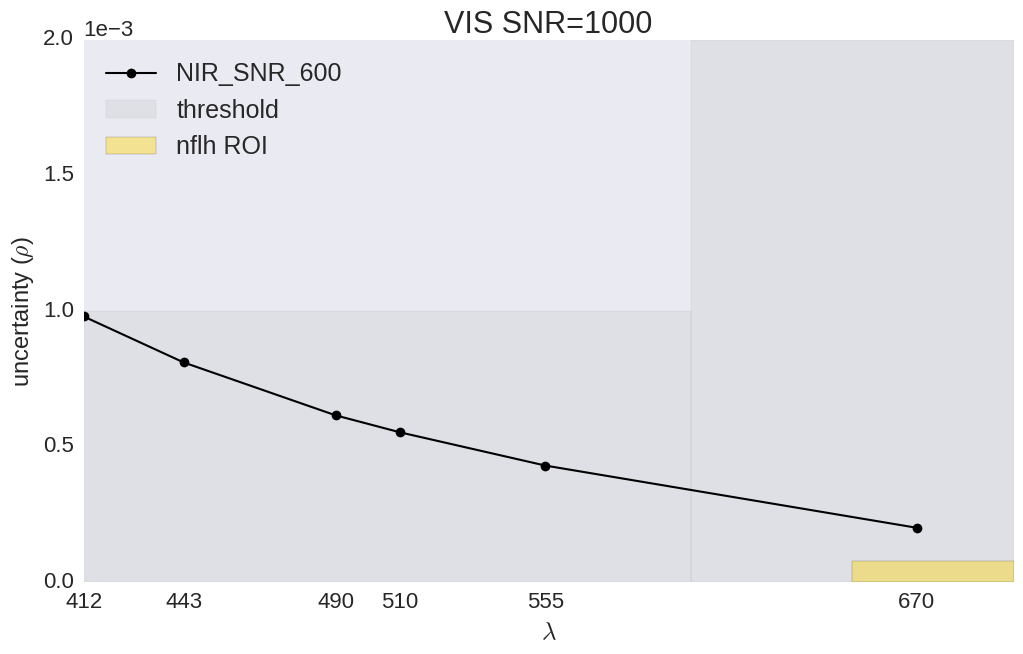

In [11]:
SummaryPlot(df95,savepath='snrSens_vvv%dnir600.png' % vvvSnr,
           title='VIS SNR=%d' % vvvSnr)